在本作业中，我们将学习基本的线性代数、NumPy和使用Python进行图像处理，以使所有人对这门课的必备技能保持一致。

这个家庭作业的目的之一是让你开始习惯在网上搜索有用的图书馆功能。在你要实现的很多函数中，你都需要查找辅助函数。


# 技术总结和提炼：

- 部分1 线性代数和numpy基操
  - 练习1.1 用numpy表示矩阵、行向量、列向量
    - np.array([[1,1,0]])，注意，即便是行向量、列向量，都必须要有两层[[]]，一层[]什么都不是。
  - 练习1.2 矩阵乘法
    - np.dot(a, b)或者a.dot(b)
  - 练习1.3 复杂的矩阵乘法：
    - 实现$(ab)(Ma^T)$
  - 练习1.4 求解特征值和特征向量。——暂未完成(后期有用到时再详细研究)
  - 练习1.5 实现一个任意维度的欧式距离计算函数。
    - ${distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}$
- 部分2 图像处理
  - 练习2.1 加载和显示图像：
    - 使用skimage和PIL。
  - 练习2.2 裁剪图像：
    - 利用python的切片功能。
  - 练习2.3 亮度调整：
    - 用个公式对每个像素点值重新赋值。
  - 练习2.4 尺度（分辨率）调整：
    - 两层for遍历output图像的H和W，给每个像素值赋值。
  - 练习2.5 旋转图像：
    - 画一个图就知道绕原点的旋转坐标公式怎么推导出来。至于绕非原点坐标旋转，公式是一样的，只是先做个相对坐标转换，计算完后再把坐标转换回相对原点坐标值。
    - <img src="旋转坐标映射公式.jpg">
  

In [65]:
# 确保按照最新版python语法规则来使用 print 函数
from __future__ import print_function

# 生成伪随机数
import random

# python的主要科学计算库
import numpy as np

# Time库帮助我们对代码运行时进行计时
import time

from linalg import *
from imageManip import *

# 绘图库
import matplotlib.pyplot as plt

# 这段代码是为了让matplotlib图形以内联方式显示在笔记本中，而不是在一个新窗口中。
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # 设置绘图的默认大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

"""★ ★ ★
以下代码作用：
jupyter中你导入引用一个py文件，如果py文件中途修改了，通常情况，那么你需要让jupyter重新执行一次import这个py文件。
有没有办法，我修改.py文件内容，jupyter中不要手动重新执行一次import呢？加下面3行代码:)
"""
# https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 问题1：线性代数和numpy回顾
在本节中，我们将回顾线性代数，并学习如何使用numpy在python中使用向量和矩阵。在本节结束时，您将实现' linalgy.py '中所有必需的方法。

## 问题 1.1（5分）
首先，通过numpy定义$M$ as a $(4, 3)$ matrix, $a$ as a $(1, 3)$ row vector and $b$ as a $(3, 1)$ column vector:

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

$$a = \begin{bmatrix}
1 & 1 & 0
\end{bmatrix}
$$

$$b = \begin{bmatrix}
-1 \\ 2 \\ 5
\end{bmatrix}  
$$ 


In [66]:
### YOUR CODE HERE
M = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
a = np.array([[1,1,0]]) #或者 np.array([1, 1, 0]).reshape(1, 3)
b = np.array([[-1],[2],[5]]) #或者 np.array([-1, 2, 5]).reshape(3, 1)
### END CODE HERE
print("M = \n", M)
print("The size of M is: ", M.shape)
print()
print("a = ", a)
print("The size of a is: ", a.shape)
print()
print("b = ", b)
print("The size of b is: ", b.shape)

M = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
The size of M is:  (4, 3)

a =  [[1 1 0]]
The size of a is:  (1, 3)

b =  [[-1]
 [ 2]
 [ 5]]
The size of b is:  (3, 1)


## 问题1.2 （5分）
实现`linalg.py`中的`dot_product()`方法。

In [67]:
# Now, let's test out this dot product. Your answer should be [[1]].
aDotB = dot_product(a, b)
print(aDotB)

print("The size is: ", aDotB.shape)

[[1]]
The size is:  (1, 1)


# 问题 1.3 （5分）
实现`linalg.py`中`complicated_matrix_function()`方法，并使用它计算$(ab)(Ma^T)$

**重要提示**：`complicated_matrix_function()`期待所有输入是一个2-D arrays，而不是1-D arrays。这是个重要的区别，因为2-D arrays 能转置，而1-D arrays 不行。

要转置2-D array，你可以使用 `array.T`

你的答案应该输出：$[[3], [9], [15], [21]]$ of shape(4, 1).

In [68]:
ans = complicated_matrix_function(M, a, b)
print(ans)
print()
print("The size is: ", ans.shape)

[[ 3]
 [ 9]
 [15]
 [21]]

The size is:  (4, 1)


In [69]:
M_2 = np.array(range(4)).reshape((2,2))
a_2 = np.array([[1,1]])
b_2 = np.array([[10, 10]]).T
print(M_2.shape)
print(a_2.shape)
print(b_2.shape)
print()

# Your answer should be $[[20], [100]]$ of shape(2, 1).
ans = complicated_matrix_function(M_2, a_2, b_2)
print(ans)
print()
print("The size is: ", ans.shape)

(2, 2)
(1, 2)
(2, 1)

[[ 20]
 [100]]

The size is:  (2, 1)


## 问题 1.4 （10分）
实现`eigen_decomp()` and `get_eigen_values_and_vectors()` methods.

在该方法中，对下面的矩阵进行特征值分解，返回最大的k个特征值和对应的特征向量(k在下面的方法调用中指定) 

$$M = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \end{bmatrix}
$$

In [70]:
# Let's define M.
M = np.array([[1,2,3],[4,5,6],[7,8,9]])

# 现在我们来取第一个特征值和第一个特征向量。
# 你应该得到一个特征值和一个特征向量。
val, vec = get_eigen_values_and_vectors(M[:,:3], 1)
print("First eigenvalue =", val[0])
print()
print("First eigenvector =", vec[0])
print()
assert len(vec) == 1

# 现在，让我们得到前两个特征值和特征向量。
# 你应该得到一个由两个特征值组成的列表和一个由两个特征向量数组组成的列表。
val, vec = get_eigen_values_and_vectors(M[:,:3], 2)
print("Eigenvalues =", val)
print()
print("Eigenvectors =", vec)
assert len(vec) == 2

IndexError: list index out of range

## 问题 1.5 （10分）
为了总结NumPy，让我们实现一些有趣的东西。一个辅助函数，用于计算两个$n$维空间内点之间的欧氏距离!

在2D坐标系，计算欧式距离可用勾股定理：$c = \sqrt{a^2 + b^2}$，给定两个坐标点$(x_1, y_1)$ and $(x_2, y_2)$, $a = x_1 - x_2$ and $b = y_1 - y_2$.

更一般地，给定两个$n$维向量，可以通过以下方法计算欧几里得距离:
$
\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$
尝试用两种方法实现这个函数:
1. 在' euclidean_distance_native() '函数中通过' for '循环实现。
2. 在' euclidean_distance_numpy() '函数中通过NumPy实现（**不使用循环**）。

我们在这里添加了一些‘assert’语句来帮助你检查功能(如果它什么也没有打印出来，那么你的实现是正确的)!


In [ ]:
## Testing native Python function
assert euclidean_distance_native([7.0], [6.0]) == 1.0
assert euclidean_distance_native([7.0, 0.0], [3.0, 3.0]) == 5.0
assert euclidean_distance_native([7.0, 0.0, 0.0], [3.0, 0.0, 3.0]) == 5.0

In [ ]:
## Testing NumPy function
assert euclidean_distance_numpy(
    np.array([7.0]),
    np.array([6.0])
) == 1.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0]),
    np.array([3.0, 3.0])
) == 5.0
assert euclidean_distance_numpy(
    np.array([7.0, 0.0, 0.0]),
    np.array([3.0, 0.0, 3.0])
) == 5.0

接下来，让我们看看这两个实现在运行时方面的比较:

In [ ]:
n = 1000

# Create some length-n lists and/or n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
start_time = time.time()
for i in range(10000):
    euclidean_distance_native(a, b)
print("常规for循环方法:", (time.time() - start_time), "seconds")

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(10000):
    euclidean_distance_numpy(a_array, b_array)
print("NumPy方法:", (time.time() - start_time), "seconds")

常规for循环方法: 2.6173739433288574 seconds
NumPy方法: 0.11668801307678223 seconds


正如你所看到的，使用NumPy进行矢量计算(例如，没有for循环)可以显著加快计算速度!

# 第2部分：图像处理

现在你已经熟悉了矩阵和向量的使用。让我们加载一些图像，把它们当作矩阵，并对它们做一些操作。


In [ ]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.

image1_path = './image1.jpg'
image2_path = './image2.jpg'

def display(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## 问题 2.1——读取图像（5分）
在imageManip.py中实现load方法并读取下面的display方法。我们将使用这两种方法在笔记本的其余部分来可视化我们的工作。

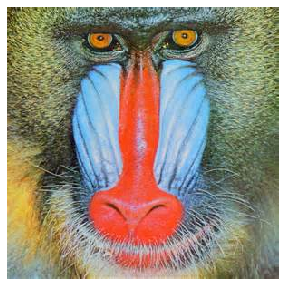

In [ ]:
image1 = load(image1_path)

display(image1)

## 问题 2.2——裁剪图像区域 （5分）

当我们处理图像时，最常见的操作之一是矩形裁剪，或者删除图像不需要的外部区域。

看一看我们写的这段代码，它可以把上面除了狒狒的眼睛以外的所有东西都剪掉:

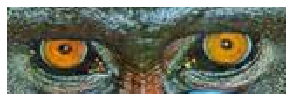

In [ ]:
display(image1[10:60, 70:230, :])

通过获取起始行索引、起始列索引、行数和列数，并输出裁剪后的图像，实现' crop_image() '方法。

然后，在下面的单元格中，看看能否从原始的image1的每个角(左上、右上、左下和右下)拉出一个100x100的正方形。

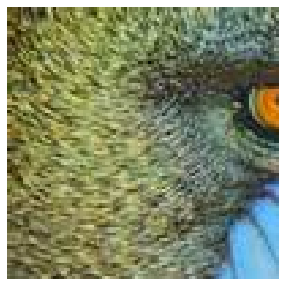

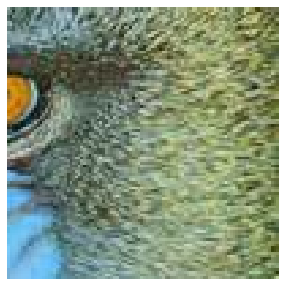

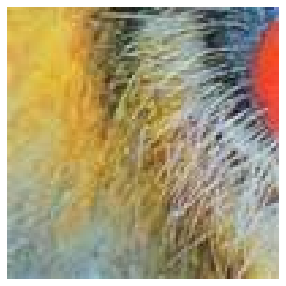

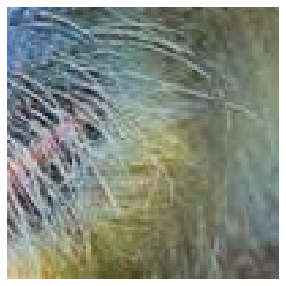

In [ ]:
top_left_corner = crop_image(image1, 0, 0, 100, 100)
top_right_corner = crop_image(image1, 0, -101, 100, 100)
bottom_left_corner = crop_image(image1, -101, 0, 100, 100)
bottom_right_corner = crop_image(image1, -101, -101, 100, 100)

display(top_left_corner)
display(top_right_corner)
display(bottom_left_corner)
display(bottom_right_corner)

## 问题 2.3——变暗图像 （10分）

实现' dim_image() '方法，根据$x_n = 0.5*x_p^2$为每个像素转换图像，其中$x_n$是新值，$x_p$是原始值。

注意:由于图像的所有像素值都在$[0,1]$的范围内，上述公式将导致减少这些像素值，从而使图像变暗。

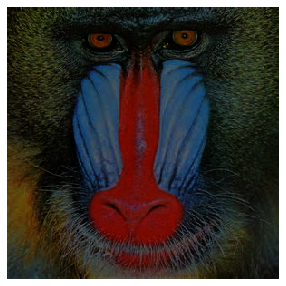

In [ ]:
new_image = dim_image(image1)
display(new_image)

## 问题 2.4——图像尺寸调整（10分）

让我们尝试另一个常用的操作:图像调整大小!

从全局上看，图像大小调整应该像这样:
1. 我们创建一个(最初为空的)所需大小的输出数组' output_image '
2. 我们迭代输出图像中的每个像素位置' (i,j) '
   - 对于每个输出像素，我们计算一个对应的输入像素' (input_i, input_j) '
   - 我们把' output_image[i, j，:] '赋给' input_image[input_i, input_j，:] '
3. 我们返回调整大小后的输出图像

我们希望' input_i '和' input_j '分别与' i '和' j '成比例增加:
- ' input_i '可以被计算为' int(i * row_scale_factor) ' 
- ' input_j '可以被计算为' int(j * col_scale_factor) '
- 
…其中' int() '是一个Python操作，接受一个浮点数并将其四舍五入至最接近的整数，' row_scale_factor '和' col_scale_factor '是根据图像输入/输出大小计算的常量。

试着找出' row_scale_factor '和' col_scale_factor '应该是什么，然后在' resize_image() '方法中实现这个算法！然后，运行下面的单元格来测试你的图像大小调整算法！当您将狒狒的尺寸缩小到16x16时，您应该期望输出如下所示

![16_16_baboon.png](16_16_baboon.png)

当你水平拉伸到50x400时，你应该得到:

![50_400_baboon.png](50_400_baboon.png)

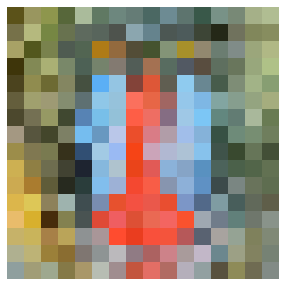

In [ ]:
display(resize_image(image1, 16, 16))

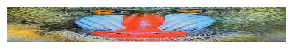

In [ ]:
display(resize_image(image1, 50, 400))

**问题：**
上面实现的尺度放缩算法，输出是通过迭代**输出图像**的索引号来填充的。迭代**原始图像**的索引来实现尺度调整可以吗？
这两种方法比较起来怎么样?
> *你的回复!*
> 
> 不行。通过遍历输出图像的W H，就已经确认输出维度和每个像素值了。遍历输入图像的HW长度是没意义的。

## 问题 2.5——旋转图像（15分）

您还可以尝试实现的一个操作是**图像旋转**。这是我们在实际的计算机视觉工作(尤其是在Facebook)中遇到的真实面试问题的一部分，我们希望它需要更多的思考。

#### a) 旋转 2D 坐标 (5 分)

在我们开始考虑旋转完整图像之前，让我们先看看旋转‘(x, y)’坐标系:

![coordinate_rotation.png](coordinate_rotation.png)

使用' np.cos() '和' np.sin() '，实现' rotate2d() '方法来计算坐标$(x'， y')$从$(x, y)$旋转的弧度。

一旦你实现了函数，下面使用assert语句测试你的实现(如果它没有打印任何东西，那么你的实现是正确的):

In [87]:
assert rotate2d(np.array([1.0, 0.0]), 0.0).shape == (
    2,
), "Output shape incorrect!"
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), 0.0), np.array([1.0, 0.0])
), ""
assert np.allclose(
    rotate2d(np.array([1.0, 0.0]), np.pi / 2.0), np.array([0.0, 1.0])
), ""

运行下面的单元格来可视化一个点，因为它围绕原点旋转了一组均匀间隔的角度!你会看到30个点排成一个圆圈。

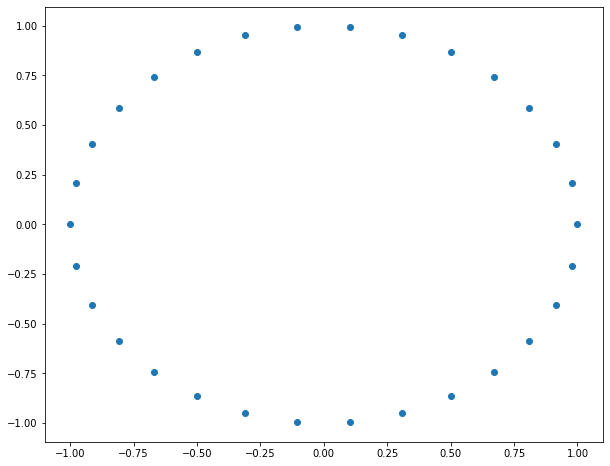

In [89]:
# 想象一个点绕原点旋转(原点在坐标轴中央)
# 为此，我们将使用matplotlib库!
import matplotlib.pyplot as plt

points = np.zeros(shape=(30, 2))
for i in range(30):
    points[i, :] = rotate2d(np.array([1.0, 0.0]), i / 30.0 * (2 * np.pi))

plt.scatter(points[:, 0], points[:, 1])
plt.show()

**问题：** 我们的函数目前只围绕原点(0,0)旋转输入点。使用相同的' rotate2d '函数，我们如何围绕不在原点的圆心旋转点？

答：
- 这个很简单。先将坐标值（相对原点）转成相对目标点的坐标值，用同样的方法计算完旋转后新坐标后，再把这个坐标值转成相对原点坐标。
- 具体操作就是： $rotate2d(np.array([i, j]) - np.array([m, n]) , theta) + np.array([m, n])$


#### b) 绕图像中心旋转图像 (10 points)
最后，使用你所学到的关于2D旋转的知识来创建和实现' rotate_image(input_image, theta) '函数!

对于输入角度$\pi/4$ (45度)，预期输出为:

![rotated_output.png](rotated_output.png)

**提示:** 
- 我们建议你的代码基于' resize_image() '实现，并应用与之前相同的一般方法。迭代输出图像' (i, j) '的每个像素，然后从对应的输入像素' (input_i, input_j) '填充颜色。在本例中，请注意输出和输入图像的大小应该相同。
- 如果你发现一个输出像素，其对应的输入坐标' input_i '和' input_j '无效，你可以忽略这个像素或设置它为黑色。
- 在我们预期的输出上面，我们旋转每个坐标围绕图像的中心，而不是原点。(原点位于左上角)

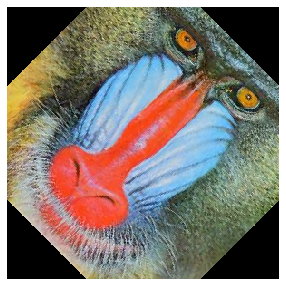

In [105]:
## Test that your output matches the expected output
display(rotate_image(image1, np.pi / 4.0))